<a href="https://colab.research.google.com/github/palldas/Neural-Network-for-Bird-Noise-Classification/blob/main/bird_cnn_v6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensor Flow Installations

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow==2.15.0 tensorflow-io==0.35.0

# Download Zip

In [ ]:
# FOR DOWNLOADING THE ZIP TO YOUR DRIVE
# (SIGN UP FREE AS A STUDENT FOR GOOGLE PRO FOR ONE YEAR TO GET ENOUGH STORAGE)

from google.colab import drive
import gdown

# URL of the birdsong zip
url = 'https://drive.google.com/file/d/1hDUldl9wH2D1ZYPFKlklj0UjLXDqwI97/view?usp=sharing'

# Path where you want to save it in your Drive
output_path = '/content/drive/MyDrive/birdsong-recognition.zip'

# Download the file directly to your Drive so the following code block works
gdown.download(url=url, output=output_path, fuzzy=True)

print(f"File saved to {output_path}")

import zipfile
import shutil

# Downloaded the kaggle data to zip file and uploaded to google drive cuz i don't have enough space locally
# link to data: https://drive.google.com/file/d/1hDUldl9wH2D1ZYPFKlklj0UjLXDqwI97/view?usp=sharing

zip_file_path = '/content/drive/MyDrive/birdsong-recognition.zip'
extract_path = '/content/drive/MyDrive/birdsong-recognition'

try:
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print(f"Successfully extracted '{zip_file_path}' to '{extract_path}'")

    # accessing the extracted files
    import os
    for root, dirs, files in os.walk(extract_path):
      for file in files:
        print(os.path.join(root,file))
        break

except FileNotFoundError:
    print(f"Error: File not found at '{zip_file_path}'. Please check the path.")
except zipfile.BadZipFile:
    print(f"Error: Invalid zip file. '{zip_file_path}' may be corrupted.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Downloading...
From (original): https://drive.google.com/uc?id=1hDUldl9wH2D1ZYPFKlklj0UjLXDqwI97
From (redirected): https://drive.google.com/uc?id=1hDUldl9wH2D1ZYPFKlklj0UjLXDqwI97&confirm=t&uuid=b604f9eb-8fe2-40f4-af74-e1289c9f3d3c
To: /content/drive/MyDrive/birdsong-recognition.zip
100%|██████████| 23.7G/23.7G [05:53<00:00, 67.1MB/s]


File saved to /content/drive/MyDrive/birdsong-recognition.zip
Successfully extracted '/content/drive/MyDrive/birdsong-recognition.zip' to '/content/drive/MyDrive/birdsong-recognition'
/content/drive/MyDrive/birdsong-recognition/example_test_audio_metadata.csv
/content/drive/MyDrive/birdsong-recognition/example_test_audio/BLKFR-10-CPL_20190611_093000.pt540.mp3
/content/drive/MyDrive/birdsong-recognition/train_audio/aldfly/XC134874.mp3
/content/drive/MyDrive/birdsong-recognition/train_audio/ameavo/XC133080.mp3
/content/drive/MyDrive/birdsong-recognition/train_audio/amebit/XC127371.mp3
/content/drive/MyDrive/birdsong-recognition/train_audio/amecro/XC109768.mp3
/content/drive/MyDrive/birdsong-recognition/train_audio/amegfi/XC109299.mp3
/content/drive/MyDrive/birdsong-recognition/train_audio/amekes/XC114061.mp3
/content/drive/MyDrive/birdsong-recognition/train_audio/amepip/XC111040.mp3
/content/drive/MyDrive/birdsong-recognition/train_audio/amered/XC101593.mp3
/content/drive/MyDrive/birdson

# Run to Mount Drive (if problems with mounting normally)
(ASSUMES PREVIOUSLY DOWNLOADED ZIP FILE THAT WAS UNZIPPED INTO 'MyDrive' UNDER 'birdsong-recognition')

In [ ]:
from google.colab import drive
import os
import shutil

# Only run this if the directory exists and the normal unmount didn't work
if os.path.exists('/content/drive'):
    # Force remove the directory contents
    for item in os.listdir('/content/drive'):
        item_path = os.path.join('/content/drive', item)
        if 'MyDrive' in item_path:
            print("Error: tried to delete MyDrive")
            break
        try:
            if os.path.isfile(item_path):
                os.remove(item_path)
            elif os.path.isdir(item_path):
                shutil.rmtree(item_path)
        except Exception as e:
            print(f"Error removing {item_path}: {e}")

    print("Cleared /content/drive directory")

# Then mount
from google.colab import drive
drive.mount('/content/drive')

Error: tried to delete MyDrive
Error removing /content/drive/.file-revisions-by-id: [Errno 125] Operation canceled: '/content/drive/.file-revisions-by-id'
Error removing /content/drive/.shortcut-targets-by-id: [Errno 125] Operation canceled: '/content/drive/.shortcut-targets-by-id'
Error removing /content/drive/.Trash-0: [Errno 2] No such file or directory: 'files'
Error removing /content/drive/.Encrypted: [Errno 125] Operation canceled: 'MyDrive'
Cleared /content/drive directory
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Augmented + Normal Spectrogram Functions

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import tensorflow_io as tfio


def create_and_save_spectrogram_augmented(mp3_path, output_image_path, sr=32000, n_mels=128):
    try:
        # Load audio
        y, sr = librosa.load(mp3_path, sr=sr)

        # use explicit call to avoid shadowing issues
        S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
        S_dB = librosa.power_to_db(S, ref=np.max)

        S_dB_float = S_dB.astype(np.float32)

        tensor = tf.convert_to_tensor(S_dB_float)


        aug_time = tfio.audio.time_mask(tensor, param=3)
        aug_freq_time = tfio.audio.freq_mask(aug_time, param=40)


        # Plot and save
        plt.figure(figsize=(4, 4))
        librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
        plt.axis('off')
        plt.tight_layout()
        plt.show()
        plt.close()

        plt.figure(figsize=(4, 4))
        plt.imshow(aug_freq_time.numpy(), aspect='auto', origin='lower', cmap='magma')
        plt.axis('off')
        plt.tight_layout()
        plt.savefig(output_image_path, bbox_inches='tight', pad_inches=0)
        plt.show()

        print(f"Saved spectrogram: {output_image_path}")


    except Exception as e:
        print(f"Error processing {mp3_path}: {e}")

def create_and_save_spectrogram(mp3_path, output_image_path, sr=32000, n_mels=128):
    try:
        # Load audio
        y, sr = librosa.load(mp3_path, sr=sr)

        # use explicit call to avoid shadowing issues
        S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
        S_dB = librosa.power_to_db(S, ref=np.max)

        # Plot and save
        plt.figure(figsize=(4, 4))
        librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
        plt.axis('off')
        plt.tight_layout()
        plt.savefig(output_image_path, bbox_inches='tight', pad_inches=0)
        plt.close()

        print(f"Saved spectrogram: {output_image_path}")
    except Exception as e:
        print(f"Error processing {mp3_path}: {e}")

# Create All Spectrograms for Species List

In [ ]:
import os


#CREATING THE NORMAL AND AUGMENTED SPECTOGRAMS

species_list = ['amecro', 'bulori', 'chispa', 'grhowl', 'horlar', 'norwat', 'mouchi', 'savspa', 'swathr', 'warvir']


base_output = '/content/drive/MyDrive/birdsong-spectrograms-new'
os.makedirs(base_output, exist_ok=True)

for species in species_list:
    input_folder = f'/content/drive/MyDrive/birdsong-recognition/train_audio/{species}'
    output_folder = os.path.join(base_output, species)
    os.makedirs(output_folder, exist_ok=True)

    count = 0
    for filename in os.listdir(input_folder):
        if filename.endswith('.mp3'):
            input_file = os.path.join(input_folder, filename)
            if count < 40:
              output_file = os.path.join(output_folder, filename.replace('.mp3', '_aug.png'))
            else:
              output_file = os.path.join(output_folder, filename.replace('.mp3', '.png'))

            # skip if the spectrogram already exists
            if os.path.exists(output_file):
                print(f"Already exists, skipping: {output_file}")
                continue
            if count < 40: #only making 40 augmented spectograms
              create_and_save_spectrogram_augmented(input_file, output_file)
            else:
              create_and_save_spectrogram(input_file, output_file)

            count += 1

# Split Data Into Train, Validation, Testing Sets

In [ ]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import pathlib
from sklearn.model_selection import train_test_split


species_list = ['amecro', 'bulori', 'chispa', 'grhowl', 'horlar', 'mouchi']

dataset_path = '/content/drive/MyDrive/birdsong-spectrograms-new'

data_dir = pathlib.Path(dataset_path).with_suffix('')
image_count = len(list(data_dir.glob('*/*.png')))
print("total images: ", image_count)

# gather class names + labels (indices) for scikit stratification
class_names = sorted([item.name for item in data_dir.glob('*') if item.is_dir()])
og_files = []
og_labels = []
aug_files = []
aug_labels = []

i = 0
for class_dir in sorted(data_dir.glob('*')):
    if class_dir.name not in species_list:
        continue
    if class_dir.is_dir():
        for img_path in class_dir.glob('*.png'):
          if 'aug' in img_path.name:
            aug_files.append(str(img_path))
            aug_labels.append(i)
          else:
            og_files.append(str(img_path))
            og_labels.append(i)
        i += 1

train_files, temp_files, train_labels, temp_labels = train_test_split(
    og_files, og_labels,
    test_size=0.35,
    random_state=42,
    stratify=og_labels
)
train_files = train_files + aug_files
train_labels = train_labels + aug_labels

# split again (20% temp goes to 10% validation and 10% test)
val_files, test_files, val_labels, test_labels = train_test_split(
    temp_files, temp_labels,
    test_size=0.5,
    random_state=42,
    stratify=temp_labels
)

print("len train files: ", len(train_files))
print("len val files: ", len(val_files))
print("len test files: ", len(test_files))



# can't use image_dataset_from_directory because no stratification options
# use tensor slices from scikit stratifcation instead, then call this function
def create_dataset(files, labels, batch_size=32, shuffle=True):
    # create dataset from files and labels
    file_ds = tf.data.Dataset.from_tensor_slices(files)
    label_ds = tf.data.Dataset.from_tensor_slices(labels)

    # function to load and preprocess images
    def load_image(file_path):
        img = tf.io.read_file(file_path)
        img = tf.image.decode_png(img, channels=3)
        img = tf.image.resize(img, [224, 224])  # resize to target size
        img = tf.cast(img, tf.float32) / 127.5 - 1  # normalize to [-1,1]
        return img

    # preprocessing
    image_ds = file_ds.map(load_image, num_parallel_calls=tf.data.AUTOTUNE)

    # combine images and labels
    dataset = tf.data.Dataset.zip((image_ds, label_ds))

    # if shuffle
    if shuffle:
        buffer_size = min(len(files), 1000)
        dataset = dataset.shuffle(buffer_size=buffer_size, seed=42)

    # batch
    dataset = dataset.batch(batch_size)

    return dataset

# Create datasets
batch_size = 32
train_ds = create_dataset(train_files, train_labels, batch_size, shuffle=True)
val_ds = create_dataset(val_files, val_labels, batch_size, shuffle=False)
test_ds = create_dataset(test_files, test_labels, batch_size, shuffle=False)

# print out dataset
ds_list = [train_ds, val_ds, test_ds]
print()
for ds in ds_list:
  for images, labels in ds:
    print(labels.numpy())
  print()




total images:  600
len train files:  474
len val files:  63
len test files:  63

[1 3 5 3 4 4 2 0 4 5 0 1 2 4 5 5 3 5 4 3 4 3 3 3 1 4 4 1 5 5 0 1]
[0 1 4 3 4 4 2 4 2 5 0 2 0 0 2 2 4 2 3 5 1 5 4 4 4 3 3 1 4 3 3 0]
[3 2 1 1 4 2 4 5 1 3 5 3 5 3 3 4 0 2 1 3 2 3 3 4 4 5 2 4 4 4 2 2]
[2 5 3 2 1 3 5 1 5 3 5 0 4 4 2 0 1 1 3 0 4 0 2 4 5 4 1 1 5 0 3 3]
[5 3 4 1 4 5 0 4 0 3 0 5 4 1 5 1 4 2 3 1 1 0 3 3 2 1 0 5 3 2 0 1]
[1 5 0 5 0 0 2 2 0 5 5 0 1 5 1 1 1 3 3 1 1 4 0 0 2 0 2 2 3 0 0 4]
[1 5 2 2 2 2 0 1 2 3 1 0 0 1 2 3 3 0 4 3 3 4 2 1 2 1 3 0 1 5 5 4]
[3 0 4 3 2 4 1 1 5 4 5 3 3 4 1 1 2 0 4 2 1 0 3 5 5 0 0 0 1 4 4 1]
[2 1 5 0 5 3 5 4 1 2 1 3 0 5 2 4 3 5 3 4 0 1 4 2 2 1 2 5 3 4 4 0]
[1 2 5 3 0 3 5 0 0 4 0 5 1 5 5 5 0 4 3 0 3 5 0 3 5 0 2 2 1 4 2 5]
[2 4 3 3 2 5 1 4 3 0 2 1 3 5 0 2 1 1 5 2 0 0 3 5 3 2 3 0 3 4 4 4]
[1 1 0 2 5 3 5 1 0 2 0 4 4 1 2 2 3 0 5 5 5 3 0 1 2 4 2 5 3 5 2 2]
[0 0 1 4 5 5 0 4 1 0 0 5 3 1 5 2 1 2 4 4 4 2 4 1 4 5 1 0 2 3 2 4]
[5 0 5 1 4 4 1 4 2 0 0 5 5 5 1 1 2 2 4 2 2 2 4 4 3 5 5 3 1 3 

# Train Model

In [ ]:
# cache optimzations per tf docs
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# build the model
num_classes = len(species_list)


model = tf.keras.Sequential([
  # first block
  tf.keras.layers.Conv2D(32, 3, activation='relu', padding='same'),
  tf.keras.layers.MaxPooling2D(),

  # second block
  tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same'),
  tf.keras.layers.MaxPooling2D(),

  tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
  tf.keras.layers.MaxPooling2D(),


  # fourth block
  tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
  tf.keras.layers.MaxPooling2D(),
  # tf.keras.layers.Dropout(0.2),

  # fifth block
  tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.2),

  # sixth block
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(num_classes)
])

# optimizer for slower learning (if needed)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)

# compile the model
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

# early stopping (so we can try more epochs with low amount of data)
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# reduce lr callback (try later)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,          # multiply learning rate by this factor
    patience=2,          # wait this many epochs before reducing
    min_lr=0.0001        # don't go below this learning rate (change if using optimizer)
)

# set up epochs
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=25,
  callbacks=[early_stopping] #, reduce_lr]
)

Epoch 1/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 76s 5s/step - accuracy: 0.2039 - loss: 1.8151 - val_accuracy: 0.5397 - val_loss: 1.4773
Epoch 2/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 70s 5s/step - accuracy: 0.4158 - loss: 1.5688 - val_accuracy: 0.6825 - val_loss: 0.8700
Epoch 3/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 70s 5s/step - accuracy: 0.5415 - loss: 1.2603 - val_accuracy: 0.7937 - val_loss: 0.6374
Epoch 4/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 71s 5s/step - accuracy: 0.7467 - loss: 0.9219 - val_accuracy: 0.8095 - val_loss: 0.4877
Epoch 5/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 80s 5s/step - accuracy: 0.7427 - loss: 0.7232 - val_accuracy: 0.8571 - val_loss: 0.4275
Epoch 6/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 70s 5s/step - accuracy: 0.7965 - loss: 0.5806 - val_accuracy: 0.8413 - val_loss: 0.4296
Epoch 7/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 70s 5s/step - accuracy: 0.8535 - loss: 0.4971 - val_accuracy: 0.8254 - val_loss: 0.4109
Epoch 8/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 81s 5s/step - accuracy: 0.8584 - loss: 0.3849 - val_accuracy: 0.8413 - val_loss:

# Train vs. Validation Accuracy Over Epochs

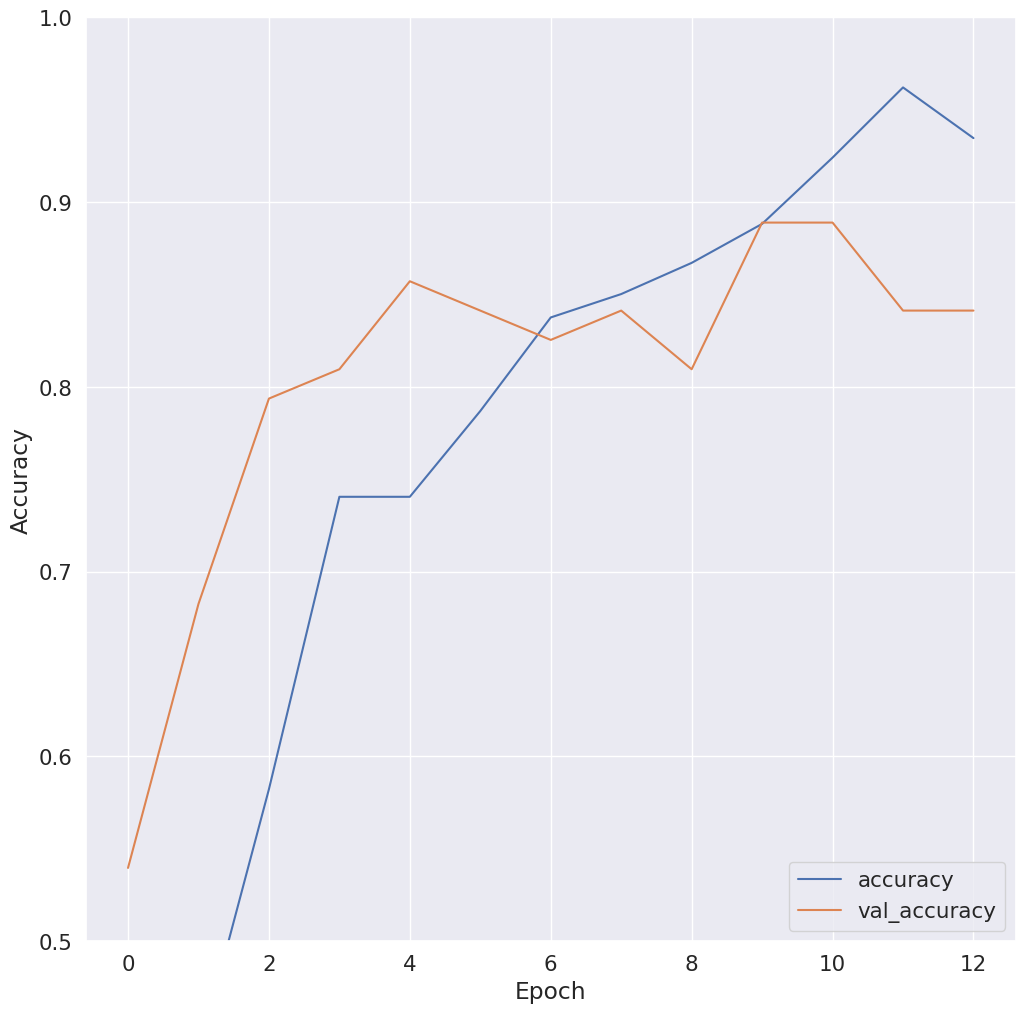

In [ ]:
import matplotlib.pyplot as plt

# plot training vs. validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

#Loss Curve (Train vs Validation Loss)

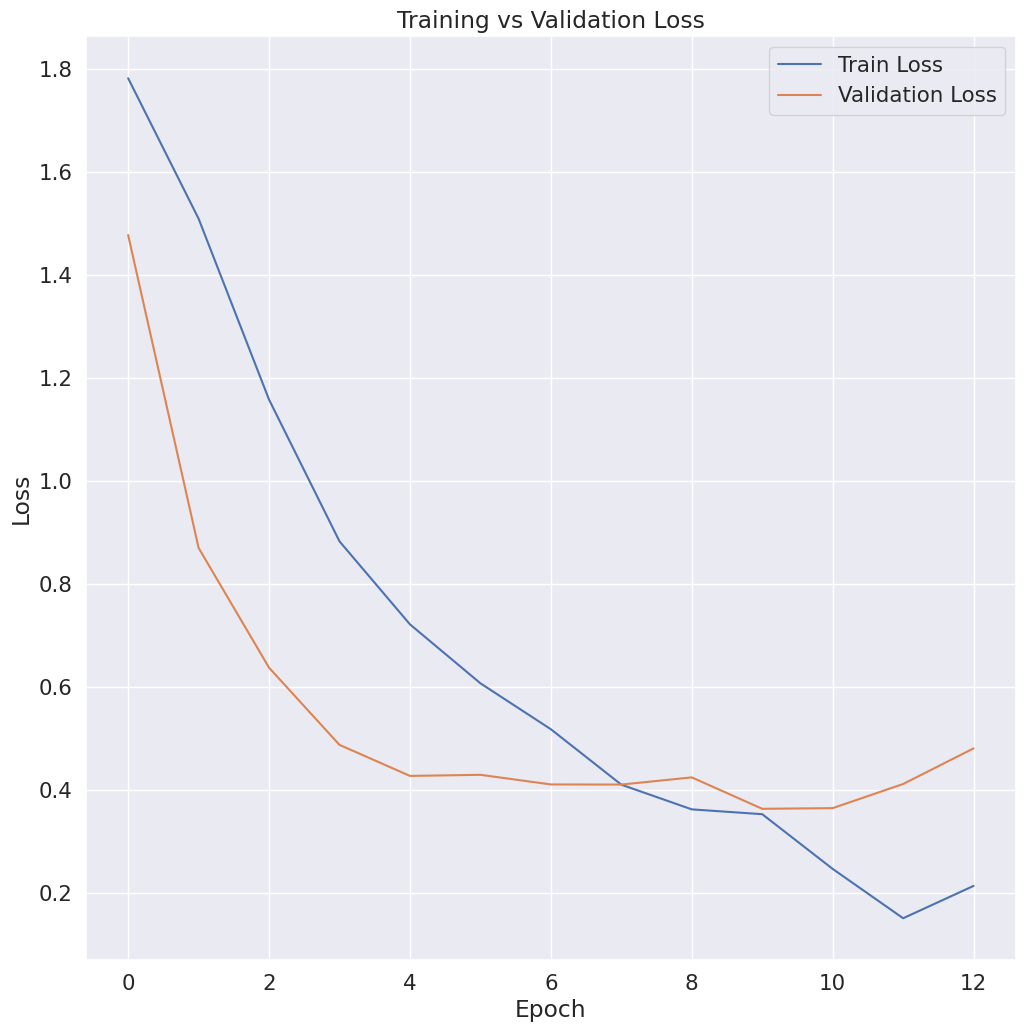

In [ ]:
# Plot train vs. validation loss
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


# Evaluate Model on Test Set + Make Confusion Matrix

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.9263 - loss: 0.2713
Test accuracy: 0.9206
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step


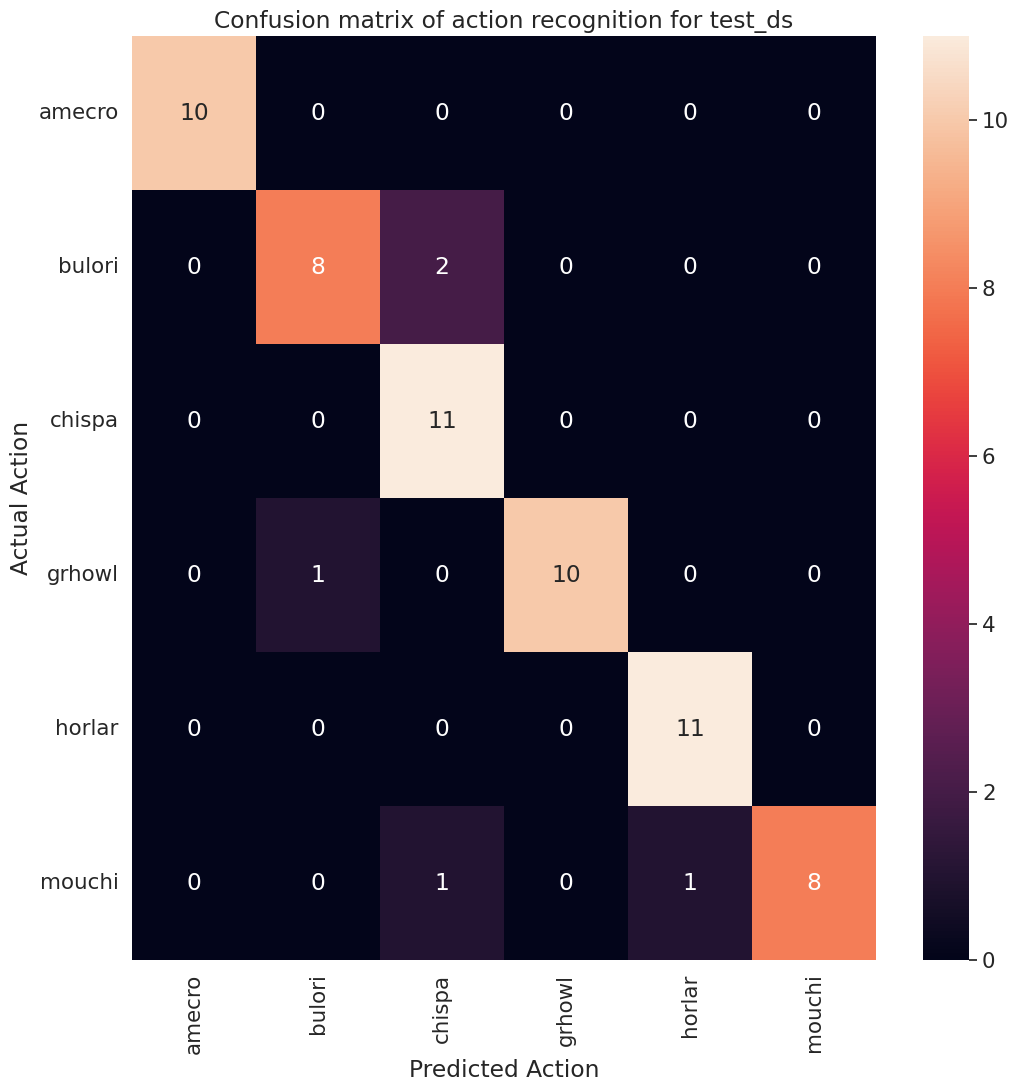

In [ ]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test accuracy: {test_accuracy:.4f}")

import seaborn as sns
def plot_confusion_matrix(actual, predicted, labels, ds_type):
  cm = tf.math.confusion_matrix(actual, predicted)
  ax = sns.heatmap(cm, annot=True, fmt='g')
  sns.set(rc={'figure.figsize':(12, 12)})
  sns.set(font_scale=1.4)
  ax.set_title('Confusion matrix of action recognition for ' + ds_type)
  ax.set_xlabel('Predicted Action')
  ax.set_ylabel('Actual Action')
  plt.xticks(rotation=90)
  plt.yticks(rotation=0)
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)

# gather labels and predictions for confusion matrix
actual = [labels for _, labels in test_ds.unbatch()]
predicted = model.predict(test_ds)
actual = tf.stack(actual, axis=0)
predicted = tf.concat(predicted, axis=0)
predicted = tf.argmax(predicted, axis=1)

plot_confusion_matrix(actual, predicted, species_list, "test_ds")

In [ ]:
from sklearn.metrics import classification_report

y_true = actual.numpy()
y_pred = predicted.numpy()

# Print classification metrics (include precision, recall, f1-score)
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=species_list))

Classification Report:
              precision    recall  f1-score   support

      amecro       1.00      1.00      1.00        10
      bulori       0.89      0.80      0.84        10
      chispa       0.79      1.00      0.88        11
      grhowl       1.00      0.91      0.95        11
      horlar       0.92      1.00      0.96        11
      mouchi       1.00      0.80      0.89        10

    accuracy                           0.92        63
   macro avg       0.93      0.92      0.92        63
weighted avg       0.93      0.92      0.92        63

